# Introduction


- the most fundamental test on Nick's pba package
- To test if the implementations of the `pba`is anyhow problematic
- A few things need to be tested

In [1]:
import matplotlib.pyplot as plt
from PyUncertainNumber import pba
import numpy as np
from PyUncertainNumber.UC.utils import *
import json
import scipy.stats as sps
import matplotlib as mpl

In [9]:
from PyUncertainNumber.pba.pbox_np import *
from PyUncertainNumber.pba.params import Params
from PyUncertainNumber.pba.utils import plot_intervals, plot_DS_structure
from PyUncertainNumber.pba.pbox_base import mixture

In [3]:
def quick_check(UN_object):

    print(UN_object)
    UN_object.show()

In [4]:
%load_ext autoreload
%autoreload 2
%load_ext rich
%matplotlib inline

# test `Interval`

In [ ]:
# test basic `Interval` instantiation and Interval arithmetic

a = pba.Interval(0,1)
b = pba.I(3,4)
c = pba.I(10,20)
d = pba.Interval(5,8)

e = a+b
f = b-2
g = c*d
h = d/c

print(e)
print(f)
print(g)
print(h)

# test `distribution`

In [ ]:
# a gaussian test

In [ ]:
gausian_dist = pba.N(0,1)

In [ ]:
gausian_dist

In [ ]:
# dir(gausian_dist)

In [ ]:
gausian_dist.ppf(95)

In [ ]:
# gausian_dist.left.min()
# gausian_dist.left.max()

- **Question**: what's the range for a Gaussian distribution?

In [ ]:
gausian_dist.rangel
# which is gausian_dist._range_list under the hood

In [ ]:
# gausian_dist.show()

gausian_dist.quick_plot()

In [ ]:
gausian_dist.mean_left
# gausian_dist.mean_right

In [ ]:
# type(gausian_dist.__dict__['left'])

In [ ]:
# out_dict =  gausian_dist.__dict__

In [ ]:
# gausian_dist.__dict__

In [ ]:
# out_dict.keys()

In [ ]:
# def choose_right_keys(out_dict):
#     out_dict.pop('left', 'right')
#     return out_dict

In [ ]:
# removed_dict = choose_right_keys(out_dict)

# removed_dict2 = entries_to_remove(entries = ['left', 'right'], the_dict=out_dict)

In [ ]:
# the JSON object
gaussian_json = json.dumps(gausian_dist, cls=ClassEncoder)

In [ ]:
# a uniform test

In [ ]:
uniform_dist = pba.U(0,1, steps=200)

In [ ]:
uniform_dist

In [ ]:
uniform_dist.show()

In [ ]:
uniform_json = json.dumps(uniform_dist, cls=ClassEncoder)

In [ ]:
# test dump 2 objects to json

In [ ]:
# globals()

In [ ]:
json_data = {
    'first_one': gaussian_json,
    'word_list': uniform_json,
    # ...
}

In [ ]:
with open('data.json', 'w') as fp:
    json.dump(json_data, fp, indent=4)

In [ ]:
# test P-box instantiation

# test `p-box`

## parametric pbox construction

**Uniform P-Box**

In [ ]:
# Erroflag: uniform pbox steps is 50 --> already solved

uniform_pbox = pba.U(pba.I(0,1), pba.I(2,3))

In [ ]:
uniform_pbox

In [ ]:
# # so the problem happens at instantiation
# # uniform_pbox.show()

# uniform_pbox.quick_plot()

**Gaussian P-Box**

In [ ]:
pbox_g1 = pba.N(pba.I(-1,1),1)
print(pbox_g1)
pbox_g1.quick_plot()

In [ ]:
# to get the range
pbox_g1.rangel

In [ ]:
# # show some basic info
# pbox_g1.steps

In [ ]:
pbox_g2 = pba.N(pba.I(-1,1),3)
print(pbox_g2)
pbox_g2.show()

In [ ]:
p_values = np.linspace(0, 1, 200)
fig, ax = plt.subplots()
ax.plot(pbox_g2.left, p_values, 'x')
ax.plot(pbox_g2.right, p_values, '.')

In [ ]:
# ''' work on the step-by-step codes '''

# L = pbox_g2.left
# R = pbox_g2.right
# steps = 200

# L.shape
# R[-1]
# y_axis = np.linspace(0, 1, 201)
# LL_n = np.concatenate((L, np.array([R[-1]])))
# RR_n = np.concatenate((np.array([L[0]]), R))

# fig, ax = plt.subplots()
# ax.plot(LL_n, y_axis)
# ax.plot(RR_n, y_axis)

**beta P-Box**

In [ ]:
quick_check(pba.beta([0.7, 1], [3, 4]))

In [ ]:
pba.beta([0.7, 1], [3, 4]).display(style='band')

**a grid of Poxes**

In [ ]:
with mpl.rc_context({"text.usetex": True}):
    fig, axs = plt.subplots(nrows=2,
                            ncols=4,  
                            figsize=(12, 7),
                            layout="constrained")
    
    # first row
    pba.normal([0, 1], [2, 3]).display(style='band', ax=axs[0, 0], title='N([0,1],[2,3])')
    pba.uniform([0, 1], 3).display(style='band', ax= axs[0, 1], title='U([0,1], 3)')
    pba.beta([0.7, 1], [3, 4]).display(style='band', ax=axs[0, 2], title='Beta([0.7,1],[3,4])')
    pba.gamma([5,6], 2).display(style='band', ax=axs[0, 3], title='Gamma([5,6],2)')
    
    # second row
    pba.lognormal([2, 3], [1, 5]).display(style='band', ax=axs[1, 0], title='Lognormal([2,3],[1,5])')
    pba.expon([0.4, 0.6]).display(style='band', ax=axs[1, 1], title='Exp([0.4, 0.6])')
    pba.chi2([20, 50]).display(style='band', ax=axs[1, 2], title='Chisquared([20, 50])')
    pba.cauchy([1, 100], 1).display(style='band', ax=axs[1, 3], title='Cauchy([1,100], 1)')
    plt.show()

## nonparametric pbox construction

- from known statistical properties

In [ ]:
with mpl.rc_context({"text.usetex": True}):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), layout="constrained")
    mean_var(0,1).display(style='band', title='MeanVar(0,1)', ax=axes[0])
    min_mean(0, 1).display(style='band', title='MeanMin(1,0)', ax=axes[1])
    min_max_mean(0,2,1).display(style='band', title='MeanMinMax(1,0,2)', ax=axes[2])
    min_max_mean_var(0, 2, 1, 0.5).display(style='band', title='MinMaxMeanVar(0, 2, 1, 0.5)', ax=axes[3])

## Data-based pbox construction

### data-based free pbox

- the bounds of a free p-box by KS confidence limits as follows:
- While the Kolmogorov–Smirnov test is usually used to test whether a given F(x) is the underlying probability distribution of Fn(x), the procedure may be inverted to give confidence limits on F(x) itself. If one chooses a critical value of the test statistic Dα such that P(Dn > Dα) = α, then a band of width ±Dα around Fn(x) will entirely contain F(x) with probability 1 − α.

In [ ]:
# use the the dataset from `Surrogate models for uncertainty quantification in the context of imprecise probability modelling`
# Params.s

In [ ]:
''' an attempt to compute ks_test statistics as the `dn` '''

# ks_result = sps.kstest(s, sps.norm.cdf)
# ks_result

In [ ]:
dn = 0.22

In [ ]:
ecdf_l, ecdf_r = c_data2freepbox(s, dn, display=True)
plt.show()

### from interval-valued pbox


In [5]:
l_bounds = np.array(Params.s) - 0.5
u_bounds = np.array(Params.s) + 0.5

In [6]:
b = [pba.I(couple) for couple in zip(l_bounds, u_bounds)]

Text(0.5, 1.0, '30 interval measurements')

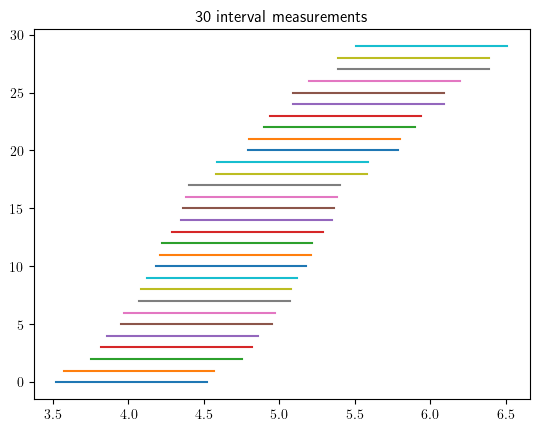

In [7]:
ax = plot_intervals(b)
ax.set_title('30 interval measurements')

In [10]:
pbox_from_imprecise_measurements = mixture(*b)

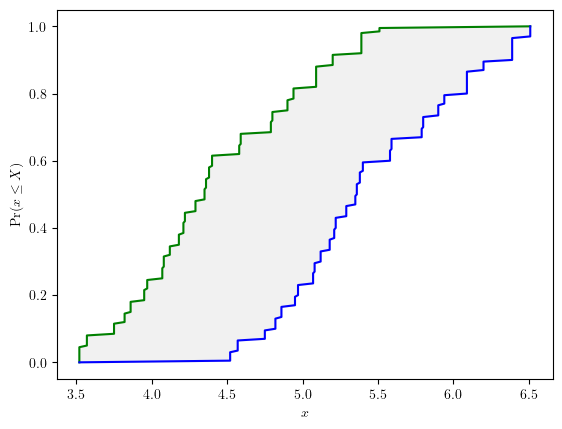

In [12]:
_ = pbox_from_imprecise_measurements.display(style='band')

### data-based parametric pbox

Statistical methods exist to estimatet the confidence intervals for fitting a distribution to sample data. Below shows an example of a Gaussian distribution

### Compound of expert opinions

# Pbox arithmetic !

## Pbox unary operations

In [ ]:
X = pba.uniform(1,[2,3])
X.display(style='band', title='$X \sim U(1,[2,3])$')

In [ ]:
Y = X**2
Y.display(style='band', title='$X^2$')

In [ ]:
# however note that a repeated multiplication will lead to a different result
(X * X).display(style='band', title='repeated multiplication: Y = X * X')

In [ ]:
# Y = sin(X)

In [ ]:
Y = np.sqrt(X)

In [ ]:
Y.display(style='band', title='$\sqrt{X}$')

In [ ]:
Y = np.exp(X)

In [ ]:
Y.display(style='band', title='$e^{X}$')

...

In [ ]:
# native instance methods from Nick ...

Y2 = X.exp()

In [ ]:
Y2.display()

In [ ]:
''' failed '''

# Y = np.sin(X)
# Y.display(style='band', title='$\ln{X}$')

## pbox binary operations

## unary operations

In [ ]:
# the base pbox


In [ ]:
# addition

In [ ]:
X = pba.U(pba.I(1,2), 4)
Y = pba.U(pba.I(1,2), 4)

In [ ]:
X.display(style='band', title='X,Y ~ U([1,2], 4)')

In [ ]:
# Z = X+Y
Z = X+Y
Z.display(style='band')

In [ ]:
# Z = X * Y
Z2 = X * Y
Z2.display(style='band')

In [ ]:
# test pbox addition
pbox_addition = pbox_g1 + pbox_g2

print(pbox_addition)
pbox_addition.show()

In [ ]:
# test pbox addition
pbox_sub = pbox_g1 - pbox_g2

quick_check(pbox_sub)

In [ ]:
## mixed-type arithmetic (i.e. Interval + PBox)

In [ ]:
# quick_check(b)

In [ ]:
print(b)

In [ ]:
pbox_g1

In [ ]:
mixed_addition = pbox_g1 + b

In [ ]:
quick_check(mixed_addition)

In [ ]:
mixed_sub = pbox_g1 - b
quick_check(mixed_sub)

# pool

In [ ]:
''' json dumps testing '''

import json

# a Python object (dict):
x = {
  "name": "John",
  "age": 30,
  "city": "New York"
}

# convert into JSON:
y = json.dumps(x)

# the result is a JSON string:
print(y)

with open('test.json', 'w') as f:
    json.dump(y, f, indent=4)